# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


In [27]:
healthcare = pd.read_csv('C:/School/healthcare_dataset.csv', sep=',')
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [28]:
healthcare.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [29]:
# unique items in the dataset
print(healthcare['Medical Condition'].unique())
print(healthcare['Blood Type'].unique())
print(healthcare['Insurance Provider'].unique())
print(healthcare['Admission Type'].unique())
print(healthcare['Medication'].unique())
print(healthcare['Test Results'].unique())

['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']
['O-' 'O+' 'B-' 'AB+' 'A+' 'AB-' 'A-' 'B+']
['Medicare' 'UnitedHealthcare' 'Aetna' 'Cigna' 'Blue Cross']
['Elective' 'Emergency' 'Urgent']
['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']
['Inconclusive' 'Normal' 'Abnormal']


In [30]:
encode = LabelEncoder()
healthcare['Gender'] = encode.fit_transform(healthcare['Gender'])
healthcare['Medical Condition'] = encode.fit_transform(healthcare['Medical Condition'])
healthcare['Blood Type'] = encode.fit_transform(healthcare['Blood Type'])
healthcare['Medication'] = encode.fit_transform(healthcare['Medication'])
healthcare['Test Results'] = encode.fit_transform(healthcare['Test Results'])
healthcare.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,0,7,3,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,0,1
1,Ruben Burns,35,1,6,1,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,2,2
2,Chad Byrd,61,1,5,5,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,2,2
3,Antonio Frederick,49,1,5,1,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,4,0
4,Mrs. Brandy Flowers,51,1,7,0,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,3,2


In [31]:
healthcare = healthcare.drop(['Date of Admission', 'Discharge Date','Doctor','Hospital','Name','Room Number','Admission Type','Insurance Provider','Billing Amount'], axis=1)


In [32]:
healthcare.head()

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
0,81,0,7,3,0,1
1,35,1,6,1,2,2
2,61,1,5,5,2,2
3,49,1,5,1,4,0
4,51,1,7,0,3,2


In [33]:
scaler = MinMaxScaler(feature_range=(1, 7))
healthcare[['Age']] = scaler.fit_transform(healthcare[['Age']])
healthcare.head()

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
0,6.641791,0,7,3,0,1
1,2.522388,1,6,1,2,2
2,4.850746,1,5,5,2,2
3,3.776119,1,5,1,4,0
4,3.955224,1,7,0,3,2


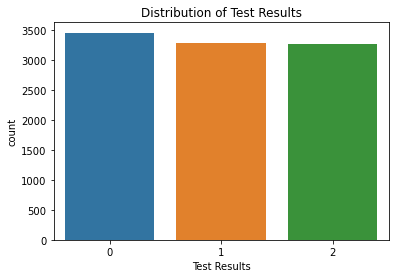

In [34]:
sns.countplot(x='Test Results', data=healthcare)
plt.title('Distribution of Test Results')
plt.show()

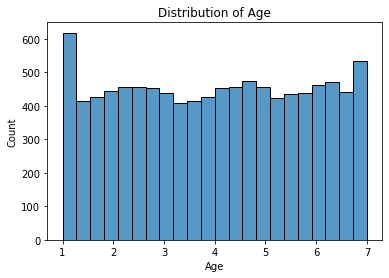

In [35]:
sns.histplot(healthcare['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

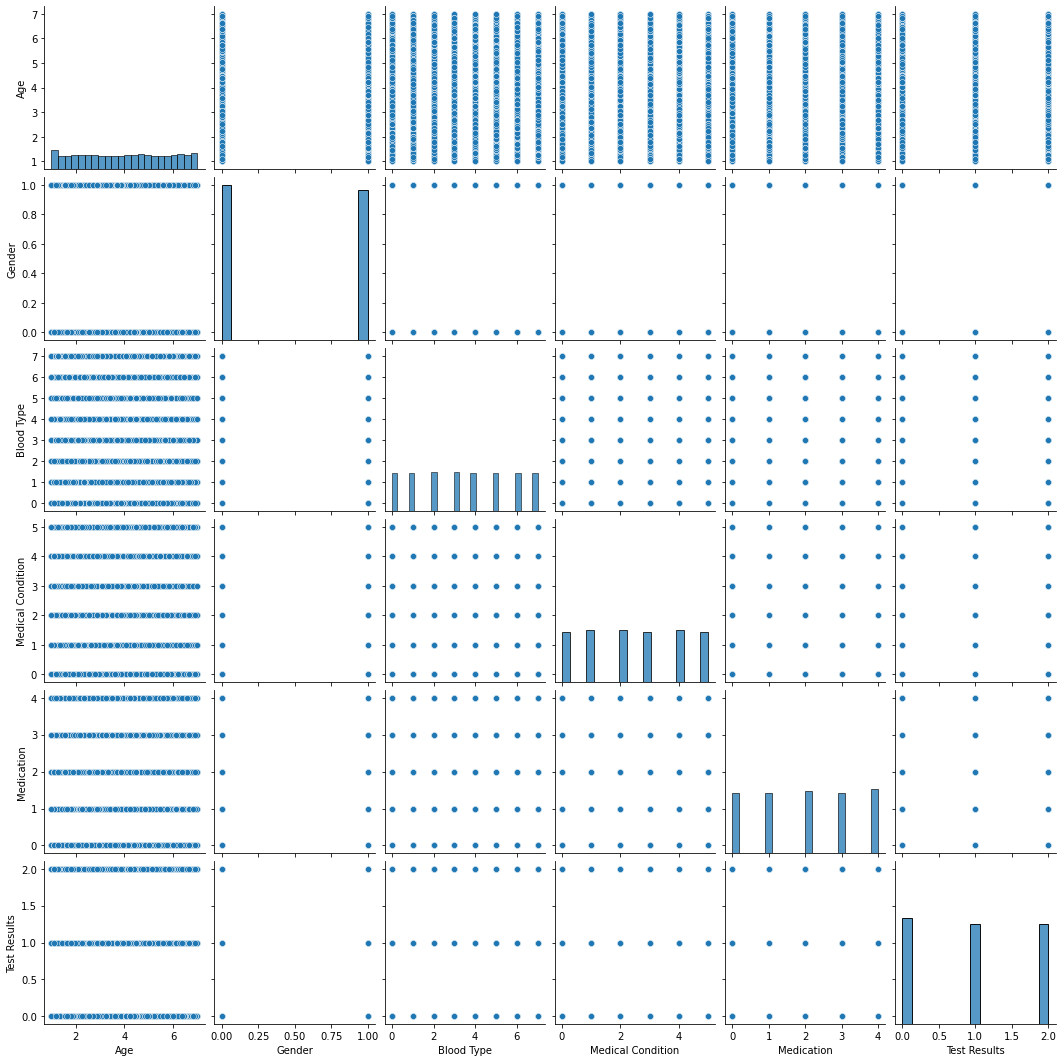

In [36]:
sns.pairplot(healthcare)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X = healthcare[['Age','Gender','Medical Condition','Blood Type','Medication']]
Y = healthcare['Test Results']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [38]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg

LogisticRegression()

In [40]:
y_pred = logreg.fit(scaled_X_train, Y_train).predict(scaled_X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion_matrix:",(confusion_matrix(Y_test,y_pred)))
print("Accuracy score: ",(accuracy_score(Y_test,y_pred)))

confusion_matrix: [[462 160  69]
 [441 141  67]
 [474 120  66]]
Accuracy score:  0.3345


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn 

KNeighborsClassifier()

In [43]:
knn.fit(scaled_X_train, Y_train).predict(scaled_X_test)

array([1, 0, 0, ..., 0, 2, 1])

In [44]:
print("confusion_matrix:",(confusion_matrix(Y_test,y_pred)))
print("Accuracy score: ",(accuracy_score(Y_test,y_pred)))

confusion_matrix: [[462 160  69]
 [441 141  67]
 [474 120  66]]
Accuracy score:  0.3345
